# **Data Clean and transform**

# Objectives

* This will import and clean the data that has been downloaded from kaggle and copied into the raw data folder.
The data will be clean as outlined in the next steps identified in the Data Analytics notebook.

The data is Data\Raw\healthcare-dataset-stroke-data.csv and Data\Raw\Life_Expectancy_Data.csv
which have been sourced from Kaggle from the raw data folder.

## Inputs

* Data\Raw\healthcare-dataset-stroke-data.csv
* Data\Raw\Life Expectancy Data.csv
* Next steps from Data Analysis

### Next Steps for Life Expectancy data
* Clean Column Names
* Handle Missing Values in numeric columns
* Handle missing values in text columns
* Fix data types
* Remove invalid data
* Remove duplicates
* Select most recent year per country for merging with stroke data
* Remove unnecessary columns
* Validate data and inspect new summary
* Export clean data

### Next steps for Stroke data

* Clean Column Names
* Handle missing values in BMI
* Fix data types
* Create categories
* Identify outliers
* Manage outliers
* Remove duplicate data
* Create Country data
*  Validate data and inspect new summary
* Create cleaned file

## Outputs

* Cleaned stroke data with countries
* Cleaned Life expectancy data





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\vscode_projects\\Capstone_KN\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\vscode_projects\\Capstone_KN'

# Import Libraries

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data into data sets

## Load Stroke data into data set and check is has been loaded correctly

In [5]:
# set file path
file_patha = r'Data\Raw\healthcare_dataset_stroke_data.csv'

# load csv
df_stroke = pd.read_csv(file_patha)

#list first 20 rows
df_stroke.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Load Life Expectancy data into data set and check is has been loaded correctly

In [6]:
# set file path
file_pathb = r'Data\Raw\Life_Expectancy_Data.csv'

# load csv
df_life_expectancy = pd.read_csv(file_pathb)

#list first 20 rows
df_life_expectancy.head(20)

,Country,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,...,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention
0,Afghanistan,2019,Male,63.29,NaN,0.003,4.454469,0.050986,0.000000,0.000321,...,0.057880,0.620751,0.151339,0.801665,1.545577,0.067079,2.008284,0.904954,2.595521,12.843526
1,Afghanistan,2019,Female,63.16,NaN,0.022,5.384610,0.043190,0.001424,0.004201,...,0.325711,0.284562,0.196666,0.194389,0.056229,0.067360,1.233210,0.667653,0.621160,12.776039
2,Afghanistan,2015,Male,61.04,22.5,0.002,6.109258,0.056666,0.000000,0.000277,...,3.980983,0.056828,0.570412,0.151665,0.769096,1.382456,0.286633,0.768236,2.553344,16.771404
3,Afghanistan,2015,Female,62.35,24.0,0.014,7.384937,0.047379,0.001201,0.003568,...,0.310311,0.322669,0.183147,0.251741,0.052141,0.172981,1.203843,0.597401,0.576237,7.570893
4,Afghanistan,2010,Male,59.60,22.1,0.006,5.652315,0.051922,0.000000,0.000243,...,0.087785,0.697883,0.235376,1.370172,1.611014,0.219533,2.513913,0.692336,2.233730,5.684718
5,Afghanistan,2010,Female,60.30,23.4,0.042,6.681426,0.044084,0.001053,0.003083,...,0.417174,0.619262,0.233198,0.727940,0.070492,0.137334,1.827513,0.552652,0.404689,2.777301
6,Afghanistan,2000,Male,54.57,21.3,0.009,6.370347,0.046050,0.000000,0.000156,...,0.077868,0.519646,0.201763,1.081965,1.165209,0.000000,2.034185,0.537209,1.786525,4.001296
7,Afghanistan,2000,Female,55.42,22.1,0.060,7.700545,0.039459,0.000651,0.001905,...,0.358929,0.407585,0.180512,0.622627,0.047653,0.000000,1.529516,0.482996,0.245428,1.902804
8,Albania,2019,Male,76.25,NaN,11.020,0.005686,0.000397,0.000000,0.000013,...,0.005705,0.064579,0.008443,0.019981,0.034043,0.033273,0.070418,0.087084,0.072844,0.000188
9,Albania,2019,Female,79.91,NaN,2.530,0.002742,0.000422,0.000120,0.000341,...,0.003247,0.060402,0.011215,0.005423,0.008541,0.020578,0.035055,0.037885,0.029722,0.000153


## Clean Stroke Data

The following steps will need to be perfromed to clean the data :

* Clean Column Names
* Handle missing values in BMI
* Fix data types
* Create categories
* Identify outliers
* Manage outliers
* Remove duplicate data
* Create Country data
*  Validate data and inspect new summary
* Create cleaned file

### Clean Column Names

In [7]:
list(df_stroke.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [8]:
# create cleaned data set for stroke data and clean column names
df_cl_stroke = df_stroke.copy()

# clean column names
df_cl_stroke.columns = (
    df_cl_stroke.columns
        .str.strip()
        .str.lower()
        .str.replace(r"\s+", "_", regex=True)      # collapse any whitespace
        .str.replace(r"[^0-9a-z_]", "", regex=True) # remove non-alnum/underscore
        .str.replace(r"_+", "_", regex=True)        # collapse multiple underscores
        .str.strip("_")                             # trim leading/trailing underscores
)

### Identify missing values

In [9]:
# Identify missing data 
df_cl_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Handle missing values in BMI

First of all calculate the mean and then populate the missing BMi data with the average (mean). T=

In [10]:
# calculate the mean of bmi column
mean_bmi = df_cl_stroke['bmi'].mean()

#display mean BMI
mean_bmi

28.893236911794666

In [11]:
# populate missing BMI with mean_bmi
df_cl_stroke['bmi'].fillna(mean_bmi, inplace=True)

# check if there are any missing values in BMI column
df_cl_stroke['bmi'].isnull().sum()


0

There is 0 missing data in the BMI field now.

### Fix data types


In [12]:
df_cl_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Hypertention, heart disease, ever married and stroke need to be convereted to boolean.


In [13]:
# Fix data types to be boolean
df_cl_stroke['hypertension'] = df_cl_stroke['hypertension'].astype(bool)
df_cl_stroke['heart_disease'] = df_cl_stroke['heart_disease'].astype(bool)
df_cl_stroke['stroke'] = df_cl_stroke['stroke'].astype(bool)
df_cl_stroke['ever_married'] = df_cl_stroke['ever_married'].astype(bool)

df_cl_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension            bool
heart_disease           bool
ever_married            bool
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                  bool
dtype: object

In [14]:
df_cl_stroke.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,False,True,True,Private,Urban,228.69,36.600000,formerly smoked,True
1,51676,Female,61.0,False,False,True,Self-employed,Rural,202.21,28.893237,never smoked,True
2,31112,Male,80.0,False,True,True,Private,Rural,105.92,32.500000,never smoked,True
3,60182,Female,49.0,False,False,True,Private,Urban,171.23,34.400000,smokes,True
4,1665,Female,79.0,True,False,True,Self-employed,Rural,174.12,24.000000,never smoked,True
5,56669,Male,81.0,False,False,True,Private,Urban,186.21,29.000000,formerly smoked,True
6,53882,Male,74.0,True,True,True,Private,Rural,70.09,27.400000,never smoked,True
7,10434,Female,69.0,False,False,True,Private,Urban,94.39,22.800000,never smoked,True
8,27419,Female,59.0,False,False,True,Private,Rural,76.15,28.893237,Unknown,True
9,60491,Female,78.0,False,False,True,Private,Urban,58.57,24.200000,Unknown,True


In [15]:
df_cl_stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   bool   
 4   heart_disease      5110 non-null   bool   
 5   ever_married       5110 non-null   bool   
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   bool   
dtypes: bool(4), float64(3), int64(1), object(4)
memory usage: 339.5+ KB


## Create categories

I am creating cetegories for the following reasons
*  Make continuous data more interpretable, such as BMI and age group
*  Simplify visualization as a category is easier to read than a value
*  To help ML models handle nonlinear relationships e.g where risk increases due to BMI
*  Imprve communication to a non-technical audience
*  Allow outlier bias to be detected easily



### Add category for BMI

According to the WHO / CDC classification for adults, BMI categories are:


| BMI Range       | Category                                 |
| --------------- | ---------------------------------------- |
| **< 18.5**      | Underweight                              |
| **18.5 – 24.9** | Normal weight                            |
| **25.0 – 29.9** | Overweight                               |
| **30.0 – 34.9** | Obesity Class I (Moderate)               |
| **35.0 – 39.9** | Obesity Class II (Severe)                |
| **≥ 40.0**      | Obesity Class III (Very Severe / Morbid) |



In [16]:
# Create categories for BMI based on WHO / CDC classification for adults
# under weight < 18.5
# normal weight 18.5 - 24.9
# overweight 25 - 29.9
# obesity class I (moderate) 30 - 34.9
# obesity class II (severe) 35 - 39.9
# obesity class III (very severe) >= 40
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
labels = [
    'Underweight',
    'Normal weight',
    'Overweight',
    'Obesity Class I (Moderate)',
    'Obesity Class II (Severe)',
    'Obesity Class III (Very Severe)'
]
# Create new column 'bmi_category' based on the bins and labels
df_cl_stroke['bmi_category'] = pd.cut(df_cl_stroke['bmi'], bins=bins, labels=labels)

# check result
df_cl_stroke[['bmi', 'bmi_category']].head(10)

,bmi,bmi_category
0,36.600000,Obesity Class II (Severe)
1,28.893237,Overweight
2,32.500000,Obesity Class I (Moderate)
3,34.400000,Obesity Class I (Moderate)
4,24.000000,Normal weight
5,29.000000,Overweight
6,27.400000,Overweight
7,22.800000,Normal weight
8,28.893237,Overweight
9,24.200000,Normal weight


### Add Categories for age reanges

I will be assigning age groups based on the NHS banding and the Office for National Statistics (ONS).  the common set used is as follows:

| Age Range | Age Group Label |
| --------- | --------------- |
| 0–4       | 0–4             |
| 5–14      | 5–14            |
| 15–24     | 15–24           |
| 25–34     | 25–34           |
| 35–44     | 35–44           |
| 45–54     | 45–54           |
| 55–64     | 55–64           |
| 65–74     | 65–74           |
| 75–84     | 75–84           |
| 85+       | 85 and over     |


In [17]:
# Define NHS-style age bands
bins = [0, 4, 14, 24, 34, 44, 54, 64, 74, 84, float('inf')]
labels = ['0–4', '5–14', '15–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85 and over']

# Add a new NHS-style age group column
df_cl_stroke['age_group_nhs'] = pd.cut(df_cl_stroke['age'], bins=bins, labels=labels, right=True)

# Check result has been added to dataset
print(df_cl_stroke[['age', 'age_group_nhs']].head(10))

    age age_group_nhs
0  67.0         65–74
1  61.0         55–64
2  80.0         75–84
3  49.0         45–54
4  79.0         75–84
5  81.0         75–84
6  74.0         65–74
7  69.0         65–74
8  59.0         55–64
9  78.0         75–84


In [18]:
df_cl_stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   bool    
 4   heart_disease      5110 non-null   bool    
 5   ever_married       5110 non-null   bool    
 6   work_type          5110 non-null   object  
 7   residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   bool    
 12  bmi_category       5110 non-null   category
 13  age_group_nhs      5110 non-null   category
dtypes: bool(4), category(2), float64(3), int64(1), object(4)
memory usage: 350.0+ KB


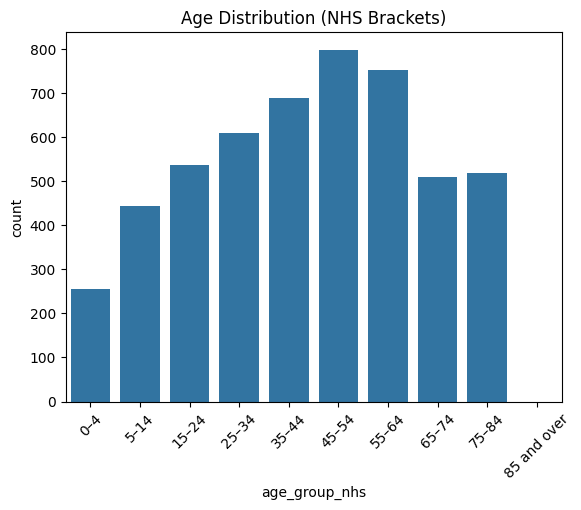

In [19]:
#Check the data shape
sns.countplot(x='age_group_nhs', data=df_cl_stroke, order=labels)
plt.title('Age Distribution (NHS Brackets)')
plt.xticks(rotation=45)
plt.show()

* Identify outliers


In [20]:
# show data summary

print(df_cl_stroke.drop(columns=['id']).describe().round(2).to_string())


           age  avg_glucose_level      bmi
count  5110.00            5110.00  5110.00
mean     43.23             106.15    28.89
std      22.61              45.28     7.70
min       0.08              55.12    10.30
25%      25.00              77.24    23.80
50%      45.00              91.88    28.40
75%      61.00             114.09    32.80
max      82.00             271.74    97.60


**The analysis of age in the stroke dataset is as follows**

* Mean age: 43.23 years

* Range: 0.08 – 82.00

* The minimum (0.08 years) is about 1 month old .  This is is unusually young for a stroke dataset and is possibley an outlier or an infant case.  

* The distribution seems wide (std = 22.61),  ths makes sense for a dataset which includes a mised se of ages.


**The analysis of Glucose levels in the stroke dataset is as follows**

* Mean: 106.15 mg/dL (normal fasting glucose ≈ 70–100 mg/dL)

* Range: 55.12 – 271.74



In [21]:
# Check top glucose levels
df_cl_stroke[['avg_glucose_level']].sort_values(by='avg_glucose_level', ascending=False).head(10)

,avg_glucose_level
193,271.74
1207,267.76
3088,267.61
4983,267.60
2462,266.59
3393,263.56
135,263.32
4457,261.67
3215,260.85
122,259.63


The levels are high but I will be checking for links to diabetes in the EDA.

**The analysis of BMI levels in the stroke dataset is as follows**

* Mean: 28.89 → in the Overweight range

* Range: 10.3 – 97.6

 The BMI of 97.6 is almost certainly an outlier (perhaps data entry error).  According to the NHS this not realistic data.
 I will there for be droping data wherre the BMI is less than 13 and higher than 60 based on suggestions

In [22]:
df_cl_stroke[df_stroke['bmi'] > 60]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group_nhs
270,72911,Female,57.0,True,False,True,Private,Rural,129.54,60.9,smokes,False,Obesity Class III (Very Severe),55–64
358,66333,Male,52.0,False,False,True,Self-employed,Urban,78.40,64.8,never smoked,False,Obesity Class III (Very Severe),45–54
466,1307,Female,61.0,True,False,True,Private,Rural,170.05,60.2,smokes,False,Obesity Class III (Very Severe),55–64
544,545,Male,42.0,False,False,True,Private,Rural,210.48,71.9,never smoked,False,Obesity Class III (Very Severe),35–44
928,41097,Female,23.0,True,False,True,Private,Urban,70.03,78.0,smokes,False,Obesity Class III (Very Severe),15–24
1559,37759,Female,53.0,False,False,True,Private,Rural,72.63,66.8,Unknown,False,Obesity Class III (Very Severe),45–54
2128,56420,Male,17.0,True,False,True,Private,Rural,61.67,97.6,Unknown,False,Obesity Class III (Very Severe),15–24
2764,20292,Female,24.0,False,False,True,Private,Urban,85.55,63.3,never smoked,False,Obesity Class III (Very Severe),15–24
2840,65895,Female,52.0,False,False,True,Private,Urban,98.27,61.2,Unknown,False,Obesity Class III (Very Severe),45–54
3825,72784,Female,52.0,False,False,True,Private,Rural,118.46,61.6,smokes,False,Obesity Class III (Very Severe),45–54


There are a number of individuals with high glucose levels, this is likely due to medical conditions such as diabetes.  this will be investigated during EDA.

## Remove Outliers

In [23]:
# remove record where age less that 1 year
df_cl_stroke = df_cl_stroke[df_cl_stroke['age'] >= 1]

# show data summary

print(df_cl_stroke.drop(columns=['id']).describe().round(2).to_string())


           age  avg_glucose_level      bmi
count  5067.00            5067.00  5067.00
mean     43.59             106.24    28.98
std      22.36              45.39     7.66
min       1.00              55.12    10.30
25%      26.00              77.28    23.90
50%      45.00              91.89    28.40
75%      61.00             114.12    32.80
max      82.00             271.74    97.60


In [24]:
# Amend  BMI values to the inclusive range [13, 60]  Dropping values reduces the dataset by too much
# - Any BMI < 13 becomes 13
# - Any BMI > 60 becomes 60
# - In-range values stay unchanged
# - NaNs remain NaN (this does not impute missing values)
df_cl_stroke["bmi"] = df_cl_stroke["bmi"].clip(lower=13, upper=60)

# Quick integrity checks
print("Maximum BMI:", df_cl_stroke["bmi"].max())   # should be ≤ 60
print("Minimum BMI:", df_cl_stroke["bmi"].min())   # should be ≥ 13
print("Remaining rows:", len(df_cl_stroke))        # clamping does not drop rows

# (Optional) hard assertions to fail fast if constraints aren’t met
# assert df_cl_stroke["bmi"].max() <= 60
# assert df_cl_stroke["bmi"].min() >= 13

Maximum BMI: 60.0
Minimum BMI: 13.0
Remaining rows: 5067


In [25]:
df_cl_stroke.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5067 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5067 non-null   int64   
 1   gender             5067 non-null   object  
 2   age                5067 non-null   float64 
 3   hypertension       5067 non-null   bool    
 4   heart_disease      5067 non-null   bool    
 5   ever_married       5067 non-null   bool    
 6   work_type          5067 non-null   object  
 7   residence_type     5067 non-null   object  
 8   avg_glucose_level  5067 non-null   float64 
 9   bmi                5067 non-null   float64 
 10  smoking_status     5067 non-null   object  
 11  stroke             5067 non-null   bool    
 12  bmi_category       5067 non-null   category
 13  age_group_nhs      5067 non-null   category
dtypes: bool(4), category(2), float64(3), int64(1), object(4)
memory usage: 386.5+ KB


## Remove duplicate data


In [26]:
df_cl_stroke = df_cl_stroke.drop_duplicates()
print("Remaining rows:", len(df_cl_stroke))

Remaining rows: 5067


## Add countries from life expectancy data set


In [27]:
# Check the life expectancy data set
print(type(df_life_expectancy))           # should be <class 'pandas.core.frame.DataFrame'>
print(df_life_expectancy.columns.tolist())  # exact column names

<class 'pandas.core.frame.DataFrame'>
['Country', 'Year', 'Gender', 'Life Expectancy at birth', 'BMI', 'Alcohol', 'Tuberculosis', 'Syphilis', 'Chlamydia', 'Gonorrhoea', 'Trichomoniasis', 'Genital herpes', 'Other STDs', 'HIV/AIDS', 'Diarrhoeal diseases', 'Whooping cough', 'Diphtheria', 'Measles', 'Tetanus', 'Meningitis', 'Encephalitis', 'Acute hepatitis A', 'Acute hepatitis B', 'Acute hepatitis C', 'Acute hepatitis E', 'Malaria', 'African Trypanosomiasis', 'Chagas disease', 'Schistosomiasis', 'Leishmaniasis', 'lymphatic filariasis', 'Onchocerciasis', 'Cysticercosis', 'Echinococcosis', 'Dengue', 'Trachoma', 'Yellow fever', 'Rabies', 'Ascariasis', 'Trichuriasis', 'Hookworm disease', 'Food-bourne trematodes', 'Leprosy', 'Lower respiratory infections', 'Upper respiratory infections', 'Otitis media', 'Preterm birth complications', 'Birth asphyxia and birth trauma', 'Neonatal sepsis and infections', 'Other neonatal conditions', 'Protein-energy malnutrition', 'Iodine deficiency', 'Vitamin A de

In [28]:
#list the columns in 

# This Selects the ‘country’ column df_life_expectancy and
# creates pandas Series containing all the country names
# with duplicates removed and NaN values dropped
countries = df_life_expectancy['Country'].dropna().unique()
# list countries
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Purinational State Of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Dijibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran (Islamic Republic of)'
 'Iraq' 'Irela

## Assign the Country to the stroke dataset

This is synthetic data so can only be used fior acedemic reasons

In [29]:
# Randomly assign a country to each record in the stroke dataset
np.random.seed(42)  # ensures reproducibility

# Make sure 'countries' exists — extract from life expectancy dataset if needed
countries = df_life_expectancy['Country'].dropna().unique()

# Assign random country to each record
df_cl_stroke['Country'] = np.random.choice(countries, size=len(df_cl_stroke))

# Remove ID column (if it exists)
df_cl_stroke = df_cl_stroke.drop(columns=['id'], errors='ignore')

# Move 'Country' to the front of the dataset
df_cl_stroke = df_cl_stroke[['Country'] + [col for col in df_cl_stroke.columns if col != 'Country']]


#change columns to lowercase
df_cl_stroke.columns = df_cl_stroke.columns.str.lower()

# Display the first 20 rows
print(df_cl_stroke.head(20))


                   country  gender   age  hypertension  heart_disease  \
0                     Mali    Male  67.0         False           True   
1                 Viet Nam  Female  61.0         False          False   
2                  Lebanon    Male  80.0         False           True   
3                  Belarus  Female  49.0         False          False   
4                   Mexico  Female  79.0          True          False   
5                    Haiti    Male  81.0         False          False   
6   Bosnia and Herzegovina    Male  74.0          True           True   
7                     Mali  Female  69.0         False          False   
8                   Norway  Female  59.0         False          False   
9                  Iceland  Female  78.0         False          False   
10                Kiribati  Female  81.0          True          False   
11             New Zealand  Female  61.0         False           True   
12                  Malawi  Female  54.0         Fa

In [30]:
df_cl_stroke.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5067 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            5067 non-null   object  
 1   gender             5067 non-null   object  
 2   age                5067 non-null   float64 
 3   hypertension       5067 non-null   bool    
 4   heart_disease      5067 non-null   bool    
 5   ever_married       5067 non-null   bool    
 6   work_type          5067 non-null   object  
 7   residence_type     5067 non-null   object  
 8   avg_glucose_level  5067 non-null   float64 
 9   bmi                5067 non-null   float64 
 10  smoking_status     5067 non-null   object  
 11  stroke             5067 non-null   bool    
 12  bmi_category       5067 non-null   category
 13  age_group_nhs      5067 non-null   category
dtypes: bool(4), category(2), float64(3), object(5)
memory usage: 386.5+ KB


## Clean Life expectancy data

* Clean Column Names
* Handle Missing Values in numeric columns
* Handle missing values in text columns
* Fix data types
* Remove invalid data
* Remove duplicates
* Select most recent year per country for merging with stroke data
* Remove unnecessary columns
* Validate data and inspect new summary
* Export clean data


### Clean Column Names
The column names need to formatted so that inconsistencies are removed.  This will make it easier for the python code to handle the data and machine friendly format means that the data is easier to use in a ML pipeline.

In [31]:
list(df_life_expectancy.columns)

['Country',
 'Year',
 'Gender',
 'Life Expectancy at birth',
 'BMI',
 'Alcohol',
 'Tuberculosis',
 'Syphilis',
 'Chlamydia',
 'Gonorrhoea',
 'Trichomoniasis',
 'Genital herpes',
 'Other STDs',
 'HIV/AIDS',
 'Diarrhoeal diseases',
 'Whooping cough',
 'Diphtheria',
 'Measles',
 'Tetanus',
 'Meningitis',
 'Encephalitis',
 'Acute hepatitis A',
 'Acute hepatitis B',
 'Acute hepatitis C',
 'Acute hepatitis E',
 'Malaria',
 'African Trypanosomiasis',
 'Chagas disease',
 'Schistosomiasis',
 'Leishmaniasis',
 'lymphatic filariasis',
 'Onchocerciasis',
 'Cysticercosis',
 'Echinococcosis',
 'Dengue',
 'Trachoma',
 'Yellow fever',
 'Rabies',
 'Ascariasis',
 'Trichuriasis',
 'Hookworm disease',
 'Food-bourne trematodes',
 'Leprosy',
 'Lower respiratory infections',
 'Upper respiratory infections',
 'Otitis media',
 'Preterm birth complications',
 'Birth asphyxia and birth trauma',
 'Neonatal sepsis and infections',
 'Other neonatal conditions',
 'Protein-energy malnutrition',
 'Iodine deficiency',


In [32]:
# Clean Column Names
# Copy to df_cl_life_expectancy
df_cl_life_expectancy = df_life_expectancy.copy()

df_cl_life_expectancy.columns = (
    df_cl_life_expectancy.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
   .str.replace("-", "_")
    .str.replace("/", "_")
)

list(df_cl_life_expectancy.columns)

['country',
 'year',
 'gender',
 'life_expectancy_at_birth',
 'bmi',
 'alcohol',
 'tuberculosis',
 'syphilis',
 'chlamydia',
 'gonorrhoea',
 'trichomoniasis',
 'genital_herpes',
 'other_stds',
 'hiv_aids',
 'diarrhoeal_diseases',
 'whooping_cough',
 'diphtheria',
 'measles',
 'tetanus',
 'meningitis',
 'encephalitis',
 'acute_hepatitis_a',
 'acute_hepatitis_b',
 'acute_hepatitis_c',
 'acute_hepatitis_e',
 'malaria',
 'african_trypanosomiasis',
 'chagas_disease',
 'schistosomiasis',
 'leishmaniasis',
 'lymphatic_filariasis',
 'onchocerciasis',
 'cysticercosis',
 'echinococcosis',
 'dengue',
 'trachoma',
 'yellow_fever',
 'rabies',
 'ascariasis',
 'trichuriasis',
 'hookworm_disease',
 'food_bourne_trematodes',
 'leprosy',
 'lower_respiratory_infections',
 'upper_respiratory_infections',
 'otitis_media',
 'preterm_birth_complications',
 'birth_asphyxia_and_birth_trauma',
 'neonatal_sepsis_and_infections',
 'other_neonatal_conditions',
 'protein_energy_malnutrition',
 'iodine_deficiency',


## Handle Missing Values in numeric columns


In [33]:
df_cl_life_expectancy.isnull().sum()

country                                         0
year                                            0
gender                                          0
life_expectancy_at_birth                       16
bmi                                           384
                                             ... 
natural_disasters                               0
other_unintentional_injuries                    0
self_harm                                       0
interpersonal_violence                          0
collective_violence_and_legal_intervention      0
Length: 147, dtype: int64

The sumamry shows that Some numeric columns like life_expectancy_at_birth and bmi have missing values.

Others (like natural_disasters, etc.) are already complete.

I will populate the the missing values with the copuntry based averages.

In [34]:
# Group the dataframe by 'country', so that each country's data is handled separately
df_cl_life_expectancy = df_cl_life_expectancy.groupby('country').apply(

    # For each group (i.e., for each country's subset of rows),
    # run this lambda function:
    lambda group: 
        # Fill missing (NaN) values in that group with the mean value
        # of each numeric column, calculated within that country.
        group.fillna(group.mean(numeric_only=True))
)

# After filling, reset the index to enable easier filtering and exporting
df_cl_life_expectancy = df_cl_life_expectancy.reset_index(drop=True)

df_cl_life_expectancy.isnull().sum()

country                                        0
year                                           0
gender                                         0
life_expectancy_at_birth                      16
bmi                                           24
                                              ..
natural_disasters                              0
other_unintentional_injuries                   0
self_harm                                      0
interpersonal_violence                         0
collective_violence_and_legal_intervention     0
Length: 147, dtype: int64

The following two code sections  will view the rows in df_lide_expectancy that still have missing data

In [35]:

# List Rows where life_expectancy_at_birth is missing
display(df_cl_life_expectancy[df_cl_life_expectancy["life_expectancy_at_birth"].isna()]
        .head(20))



,country,year,gender,life_expectancy_at_birth,bmi,alcohol,tuberculosis,syphilis,chlamydia,gonorrhoea,...,poisonings,falls,"fire,_heat_and_hot_substances",drowning,exposure_to_mechanical_forces,natural_disasters,other_unintentional_injuries,self_harm,interpersonal_violence,collective_violence_and_legal_intervention
960,North Macedonia,2019,Male,NaN,NaN,10.36,2.270053e-02,0.000170,0.000000,0.000000,...,0.008322,0.037465,0.006924,0.011936,0.010815,0.000000,0.131506,0.145284,0.022790,0.000110
961,North Macedonia,2019,Female,NaN,NaN,2.54,9.105056e-03,0.000107,0.000000,0.000000,...,0.002897,0.040327,0.003980,0.005881,0.001437,0.000000,0.051500,0.050427,0.008125,0.000109
962,North Macedonia,2015,Male,NaN,NaN,2.38,2.145160e-02,0.000264,0.000000,0.000000,...,0.119732,0.008516,0.034828,0.006955,0.012482,0.011057,0.004096,0.142351,0.024090,0.000111
963,North Macedonia,2015,Female,NaN,NaN,9.63,8.281118e-03,0.000188,0.000000,0.000000,...,0.002906,0.035914,0.003998,0.005700,0.001424,0.002798,0.048057,0.048323,0.008025,0.000111
964,North Macedonia,2010,Male,NaN,NaN,2.38,3.112957e-02,0.000129,0.000000,0.000000,...,0.007582,0.041426,0.006173,0.020458,0.012271,0.000000,0.146790,0.104531,0.037194,0.000109
965,North Macedonia,2010,Female,NaN,NaN,9.55,1.044807e-02,0.000088,0.000000,0.000000,...,0.005222,0.042897,0.005185,0.007620,0.001365,0.000000,0.040619,0.041860,0.015543,0.000109
966,North Macedonia,2000,Male,NaN,NaN,11.41,8.720310e-02,0.000398,0.000000,0.000000,...,0.010100,0.049997,0.012426,0.033597,0.048434,0.000000,0.135343,0.133573,0.048899,0.004515
967,North Macedonia,2000,Female,NaN,NaN,2.91,3.194443e-02,0.000229,0.000000,0.000000,...,0.004420,0.046156,0.005243,0.003548,0.004189,0.000000,0.057246,0.056038,0.015943,0.001859
1152,Seychelles,2019,Male,NaN,26.066667,13.41,3.640000e-06,0.000132,0.000000,0.000004,...,0.000297,0.004432,0.001291,0.010040,0.000635,0.000000,0.003415,0.007243,0.010958,0.000070
1153,Seychelles,2019,Female,NaN,26.066667,4.02,6.090000e-07,0.000082,0.000016,0.000046,...,0.000222,0.001138,0.000488,0.001621,0.000067,0.000000,0.000846,0.000665,0.003516,0.000005


In [36]:
# List Rows where BMI is missing
display(df_cl_life_expectancy[df_cl_life_expectancy["bmi"].isna()]
        .head(20))

,country,year,gender,life_expectancy_at_birth,bmi,alcohol,tuberculosis,syphilis,chlamydia,gonorrhoea,...,poisonings,falls,"fire,_heat_and_hot_substances",drowning,exposure_to_mechanical_forces,natural_disasters,other_unintentional_injuries,self_harm,interpersonal_violence,collective_violence_and_legal_intervention
960,North Macedonia,2019,Male,NaN,NaN,10.36,0.022701,0.000170,0.000000,0.000000,...,0.008322,0.037465,0.006924,0.011936,0.010815,0.000000,0.131506,0.145284,0.022790,0.000110
961,North Macedonia,2019,Female,NaN,NaN,2.54,0.009105,0.000107,0.000000,0.000000,...,0.002897,0.040327,0.003980,0.005881,0.001437,0.000000,0.051500,0.050427,0.008125,0.000109
962,North Macedonia,2015,Male,NaN,NaN,2.38,0.021452,0.000264,0.000000,0.000000,...,0.119732,0.008516,0.034828,0.006955,0.012482,0.011057,0.004096,0.142351,0.024090,0.000111
963,North Macedonia,2015,Female,NaN,NaN,9.63,0.008281,0.000188,0.000000,0.000000,...,0.002906,0.035914,0.003998,0.005700,0.001424,0.002798,0.048057,0.048323,0.008025,0.000111
964,North Macedonia,2010,Male,NaN,NaN,2.38,0.031130,0.000129,0.000000,0.000000,...,0.007582,0.041426,0.006173,0.020458,0.012271,0.000000,0.146790,0.104531,0.037194,0.000109
965,North Macedonia,2010,Female,NaN,NaN,9.55,0.010448,0.000088,0.000000,0.000000,...,0.005222,0.042897,0.005185,0.007620,0.001365,0.000000,0.040619,0.041860,0.015543,0.000109
966,North Macedonia,2000,Male,NaN,NaN,11.41,0.087203,0.000398,0.000000,0.000000,...,0.010100,0.049997,0.012426,0.033597,0.048434,0.000000,0.135343,0.133573,0.048899,0.004515
967,North Macedonia,2000,Female,NaN,NaN,2.91,0.031944,0.000229,0.000000,0.000000,...,0.004420,0.046156,0.005243,0.003548,0.004189,0.000000,0.057246,0.056038,0.015943,0.001859
1216,South Sudan,2019,Male,60.83,NaN,NaN,2.323327,0.204379,0.000000,0.001153,...,0.143060,0.164951,0.236823,0.261317,0.148627,0.083637,0.751740,0.314336,1.232052,0.429268
1217,South Sudan,2019,Female,64.84,NaN,NaN,1.447591,0.146697,0.001956,0.005141,...,0.115983,0.104514,0.196658,0.204848,0.119529,0.050632,0.455087,0.111040,0.351876,0.184954


## Populate remainin 16 rows that are missing data in life_expecatancy at birth  with median values


In [37]:
col = "life_expectancy_at_birth"
mask = df_cl_life_expectancy[col].isna()  # rows to fill

for keys in [
    ["country", "gender", "year"],
    ["country", "gender"],
    ["country"],
    ["gender", "year"],
    ["year"],
    ["gender"],
]:
    if not mask.any():
        break
    med = df_cl_life_expectancy.groupby(keys)[col].transform("median")
    df_cl_life_expectancy.loc[mask, col] = df_cl_life_expectancy.loc[mask, col].fillna(med[mask])
    mask = df_cl_life_expectancy[col].isna()  # update what's still missing

# final fallback: global median (only if anything still missing)
if mask.any():
    df_cl_life_expectancy.loc[mask, col] = df_cl_life_expectancy[col].median()

df_cl_life_expectancy.isnull().sum()

country                                        0
year                                           0
gender                                         0
life_expectancy_at_birth                       0
bmi                                           24
                                              ..
natural_disasters                              0
other_unintentional_injuries                   0
self_harm                                      0
interpersonal_violence                         0
collective_violence_and_legal_intervention     0
Length: 147, dtype: int64

## Populate 24 rows in BMi with median value

Median is more suitable for BMI because it is skwewed data as standard.

In [38]:
# set column to bmi
col = "bmi"
mask = df_cl_life_expectancy[col].isna()  # identify rows to fill

for keys in [
    ["country", "gender", "year"],
    ["country", "gender"],
    ["country"],
    ["gender", "year"],
    ["year"],
    ["gender"],
]:
    if not mask.any():
        break
    med = df_cl_life_expectancy.groupby(keys)[col].transform("median")
    df_cl_life_expectancy.loc[mask, col] = df_cl_life_expectancy.loc[mask, col].fillna(med[mask])
    mask = df_cl_life_expectancy[col].isna()  # update remaining NaNs

# final fallback: global median (only if anything still missing)
if mask.any():
    df_cl_life_expectancy.loc[mask, col] = df_cl_life_expectancy[col].median()

df_cl_life_expectancy.isnull().sum()

country                                       0
year                                          0
gender                                        0
life_expectancy_at_birth                      0
bmi                                           0
                                             ..
natural_disasters                             0
other_unintentional_injuries                  0
self_harm                                     0
interpersonal_violence                        0
collective_violence_and_legal_intervention    0
Length: 147, dtype: int64

All null values are now populated with median data.

### Handle missing values in text columns


In [39]:
# Choose your text columns explicitly or detect them:
text_cols = df_life_expectancy.select_dtypes(include=["object", "string"]).columns.tolist()

# Convert to string dtype (optional but tidy)
df_life_expectancy[text_cols] = df_life_expectancy[text_cols].apply(lambda s: s.astype("string"))

# Common “null-like” tokens → NaN; also trim whitespace-only strings
null_data = {"", " ", "NA", "N/A", "na", "n/a", "--", "Nan", "NaN"}  # adjust if you want to keep "Unknown"
for c in text_cols:
    s = df_life_expectancy[c].str.strip()
    df_life_expectancy[c] = s.mask(s.isin(null_data))

## Fix data types


In [40]:
pd.set_option("display.max_rows", None)  # show all rows
print(df_cl_life_expectancy.dtypes)         # e.g., country    string[python]

country                                        object
year                                            int64
gender                                         object
life_expectancy_at_birth                      float64
bmi                                           float64
alcohol                                       float64
tuberculosis                                  float64
syphilis                                      float64
chlamydia                                     float64
gonorrhoea                                    float64
trichomoniasis                                  int64
genital_herpes                                  int64
other_stds                                    float64
hiv_aids                                      float64
diarrhoeal_diseases                           float64
whooping_cough                                float64
diphtheria                                    float64
measles                                       float64
tetanus                     

In [41]:
# STRATEGY for fixing dtypes:
# - Keys like 'country'/'gender' repeat a lot → use 'category' to save memory and speed up groupby/joins.
# - 'year' fits in a small integer range → use nullable Int16 (keeps NaNs without upcasting to float).
# - Most measures are continuous rates → Float32 usually gives enough precision at half the memory of Float64.
# - If you have true COUNT columns (integers by definition), keep them as nullable Int32.
#
# Notes:
# - Nullable dtypes (Int16/Int32/Float32) keep missing values safely.
# - If a downstream lib demands float64 (rare), upcast only those columns right before use.

# 1) KEY COLUMNS → 'category'
#    - Massive memory win for repeated strings; faster categorical operations.
#    - Beware: when merging with another DF, ensure category levels align or cast to string temporarily.
df_cl_life_expectancy["country"] = df_cl_life_expectancy["country"].astype("category")
df_cl_life_expectancy["gender"]  = df_cl_life_expectancy["gender"].astype("category")

# 2) YEAR → small nullable integer
#    - Coerce to numeric in case the CSV had strings; then cast to Int16 (range is plenty for years).
#    - Using 'Int16' (nullable) instead of 'int64' avoids float upcast when NaNs are present.
df_cl_life_expectancy["year"] = (
    pd.to_numeric(df_cl_life_expectancy["year"], errors="coerce")
      .astype("Int16")
)

# 3) MEASURE COLUMNS → Float32 by default
#    - Pick every column except the keys ('country','gender') and 'year'.
#    - Convert to numeric with errors='coerce' (bad strings → NaN) to standardize.
#    - Cast to Float32 for efficiency. If you later need double precision for specific stats, upcast just those.
measure_cols = [c for c in df_cl_life_expectancy.columns if c not in {"country", "gender", "year"}]

df_cl_life_expectancy[measure_cols] = (
    df_cl_life_expectancy[measure_cols]
      .apply(pd.to_numeric, errors="coerce")  # standardize weird strings like "NA", "—", etc.
      .astype("Float32")                      # compact, good enough precision for most analytics/ML
)

df_cl_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Columns: 147 entries, country to collective_violence_and_legal_intervention
dtypes: Float32(144), Int16(1), category(2)
memory usage: 1.0 MB


## Merge Year into the Stroke data set

### Select most recent year per country for merging with stroke data

Adding a year to the stroke data will prevent multiple life expectancies per country.  It will be easier to do predictive analysis with a year against the stroke data set.


In [42]:

# row indices of each country's latest year (observed=True avoids the FutureWarning)
idx = df_cl_life_expectancy.groupby("country", observed=True)["year"].idxmax()

# keep ALL columns for those rows (one row per country)
le_latest_full = df_cl_life_expectancy.loc[idx].drop_duplicates(subset=["country"], keep="first")

print(le_latest_full.shape)
le_latest_full.head()


(183, 147)


,country,year,gender,life_expectancy_at_birth,bmi,alcohol,tuberculosis,syphilis,chlamydia,gonorrhoea,...,poisonings,falls,"fire,_heat_and_hot_substances",drowning,exposure_to_mechanical_forces,natural_disasters,other_unintentional_injuries,self_harm,interpersonal_violence,collective_violence_and_legal_intervention
0,Afghanistan,2019,Male,63.290001,22.566668,0.003,4.454469,0.050986,0.0,0.000321,...,0.05788,0.620751,0.151339,0.801665,1.545577,0.067079,2.008284,0.904954,2.595521,12.843526
8,Albania,2019,Male,76.25,25.950001,11.02,0.005686,0.000397,0.0,0.000013,...,0.005705,0.064579,0.008443,0.019981,0.034043,0.033273,0.070418,0.087084,0.072844,0.000188
16,Algeria,2019,Male,76.230003,24.950001,0.17,1.646268,0.022712,0.0,0.00019,...,0.170393,0.892896,0.324713,0.346474,0.537094,0.0,0.925406,0.681545,0.546617,0.033933
24,Angola,2019,Male,60.700001,22.549999,12.39,9.969069,0.776961,0.0,0.002506,...,0.415214,0.770528,0.455503,0.803426,0.437926,0.019202,1.681545,1.566501,2.403008,0.015079
32,Antigua and Barbuda,2019,Male,74.879997,25.933332,15.09,0.000361,0.000002,0.0,0.0,...,0.000633,0.0,0.000171,0.001635,0.008049,0.0,0.014206,0.0,0.001739,0.000015


### Merge year with Stroke data set

In [43]:
df_cl_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5067 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            5067 non-null   object  
 1   gender             5067 non-null   object  
 2   age                5067 non-null   float64 
 3   hypertension       5067 non-null   bool    
 4   heart_disease      5067 non-null   bool    
 5   ever_married       5067 non-null   bool    
 6   work_type          5067 non-null   object  
 7   residence_type     5067 non-null   object  
 8   avg_glucose_level  5067 non-null   float64 
 9   bmi                5067 non-null   float64 
 10  smoking_status     5067 non-null   object  
 11  stroke             5067 non-null   bool    
 12  bmi_category       5067 non-null   category
 13  age_group_nhs      5067 non-null   category
dtypes: bool(4), category(2), float64(3), object(5)
memory usage: 386.5+ KB


In [44]:
# Build a unique mapping: country -> le_year
le_years = (
    le_latest_full[["country", "year"]]
      .dropna(subset=["country", "year"])
      .drop_duplicates(subset=["country"], keep="first")
      .rename(columns={"year": "le_year"})
)

# Ensure join key dtypes match
df_cl_stroke["country"] = df_cl_stroke["country"].astype("string")
le_years["country"]     = le_years["country"].astype("string")

# Left-merge onto stroke data
df_cl_stroke = df_cl_stroke.merge(le_years, on="country", how="left")

# Quick check
print(df_cl_stroke[["country", "le_year"]].head())
print("Missing le_year after merge:", df_cl_stroke["le_year"].isna().sum())

    country  le_year
0      Mali     2019
1  Viet Nam     2019
2   Lebanon     2019
3   Belarus     2019
4    Mexico     2019
Missing le_year after merge: 0


In [45]:
df_cl_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            5067 non-null   string  
 1   gender             5067 non-null   object  
 2   age                5067 non-null   float64 
 3   hypertension       5067 non-null   bool    
 4   heart_disease      5067 non-null   bool    
 5   ever_married       5067 non-null   bool    
 6   work_type          5067 non-null   object  
 7   residence_type     5067 non-null   object  
 8   avg_glucose_level  5067 non-null   float64 
 9   bmi                5067 non-null   float64 
 10  smoking_status     5067 non-null   object  
 11  stroke             5067 non-null   bool    
 12  bmi_category       5067 non-null   category
 13  age_group_nhs      5067 non-null   category
 14  le_year            5067 non-null   Int16   
dtypes: Int16(1), bool(4), category(2), float64(3), object(4

In [48]:
# move year to beginning of stroke dataset
df_cl_stroke = df_cl_stroke[['le_year'] + [col for col in df_cl_stroke.columns if col != 'le_year']]

df_cl_stroke.head(10)


,le_year,country,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group_nhs
0,2019,Mali,Male,67.0,False,True,True,Private,Urban,228.69,36.600000,formerly smoked,True,Obesity Class II (Severe),65–74
1,2019,Viet Nam,Female,61.0,False,False,True,Self-employed,Rural,202.21,28.893237,never smoked,True,Overweight,55–64
2,2019,Lebanon,Male,80.0,False,True,True,Private,Rural,105.92,32.500000,never smoked,True,Obesity Class I (Moderate),75–84
3,2019,Belarus,Female,49.0,False,False,True,Private,Urban,171.23,34.400000,smokes,True,Obesity Class I (Moderate),45–54
4,2019,Mexico,Female,79.0,True,False,True,Self-employed,Rural,174.12,24.000000,never smoked,True,Normal weight,75–84
5,2019,Haiti,Male,81.0,False,False,True,Private,Urban,186.21,29.000000,formerly smoked,True,Overweight,75–84
6,2019,Bosnia and Herzegovina,Male,74.0,True,True,True,Private,Rural,70.09,27.400000,never smoked,True,Overweight,65–74
7,2019,Mali,Female,69.0,False,False,True,Private,Urban,94.39,22.800000,never smoked,True,Normal weight,65–74
8,2019,Norway,Female,59.0,False,False,True,Private,Rural,76.15,28.893237,Unknown,True,Overweight,55–64
9,2019,Iceland,Female,78.0,False,False,True,Private,Urban,58.57,24.200000,Unknown,True,Normal weight,75–84


In [49]:
df_cl_stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   le_year            5067 non-null   Int16   
 1   country            5067 non-null   string  
 2   gender             5067 non-null   object  
 3   age                5067 non-null   float64 
 4   hypertension       5067 non-null   bool    
 5   heart_disease      5067 non-null   bool    
 6   ever_married       5067 non-null   bool    
 7   work_type          5067 non-null   object  
 8   residence_type     5067 non-null   object  
 9   avg_glucose_level  5067 non-null   float64 
 10  bmi                5067 non-null   float64 
 11  smoking_status     5067 non-null   object  
 12  stroke             5067 non-null   bool    
 13  bmi_category       5067 non-null   category
 14  age_group_nhs      5067 non-null   category
dtypes: Int16(1), bool(4), category(2), float64(3), object(4

* Remove unnecessary columns

In [50]:
# remove id from df_cl_stroke
df_cl_stroke = df_cl_stroke.drop(columns=['id'], errors='ignore')

# remove life_expectancy_at_birth from df_cl_life_expectancy
df_cl_life_expectancy = df_cl_life_expectancy.drop(columns=['life_expectancy_at_birth'], errors='ignore')

## Validate data and inspect new summary

In [51]:
df_cl_life_expectancy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Columns: 146 entries, country to collective_violence_and_legal_intervention
dtypes: Float32(143), Int16(1), category(2)
memory usage: 1.0 MB


In [54]:
# One per line
for columns in df_cl_life_expectancy.columns:
    print(columns)

country
year
gender
bmi
alcohol
tuberculosis
syphilis
chlamydia
gonorrhoea
trichomoniasis
genital_herpes
other_stds
hiv_aids
diarrhoeal_diseases
whooping_cough
diphtheria
measles
tetanus
meningitis
encephalitis
acute_hepatitis_a
acute_hepatitis_b
acute_hepatitis_c
acute_hepatitis_e
malaria
african_trypanosomiasis
chagas_disease
schistosomiasis
leishmaniasis
lymphatic_filariasis
onchocerciasis
cysticercosis
echinococcosis
dengue
trachoma
yellow_fever
rabies
ascariasis
trichuriasis
hookworm_disease
food_bourne_trematodes
leprosy
lower_respiratory_infections
upper_respiratory_infections
otitis_media
preterm_birth_complications
birth_asphyxia_and_birth_trauma
neonatal_sepsis_and_infections
other_neonatal_conditions
protein_energy_malnutrition
iodine_deficiency
vitamin_a_deficiency
iron_deficiency_anaemia
other_nutritional_deficiencies
mouth_and_oropharynx_cancers
oesophagus_cancer
stomach_cancer
colon_and_rectum_cancers
liver_cancer
pancreas_cancer
trachea,_bronchus,_lung_cancers
malignant

In [52]:
df_cl_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   le_year            5067 non-null   Int16   
 1   country            5067 non-null   string  
 2   gender             5067 non-null   object  
 3   age                5067 non-null   float64 
 4   hypertension       5067 non-null   bool    
 5   heart_disease      5067 non-null   bool    
 6   ever_married       5067 non-null   bool    
 7   work_type          5067 non-null   object  
 8   residence_type     5067 non-null   object  
 9   avg_glucose_level  5067 non-null   float64 
 10  bmi                5067 non-null   float64 
 11  smoking_status     5067 non-null   object  
 12  stroke             5067 non-null   bool    
 13  bmi_category       5067 non-null   category
 14  age_group_nhs      5067 non-null   category
dtypes: Int16(1), bool(4), category(2), float64(3), object(4

## Create cleaned files 

In [59]:
from pathlib import Path

out_dir = Path("Data") / "Cleaned"
out_dir.mkdir(parents=True, exist_ok=True)  # create folders if missing

(df_cl_stroke).to_csv(out_dir / "Clean_stroke_data.csv", index=False, encoding="utf-8")
(df_cl_life_expectancy).to_csv(out_dir / "Clean_life_expectancy.csv", index=False, encoding="utf-8")


---